In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sigproc as sp

In [2]:
wav_sr = 16000
dftlen = 4096

In [3]:
pml_feat_gta = np.load('/home/josh/tacotron/tacotron_output/gta/pml-ljspeech-00001.npy')
pml_feat_natural = np.load('/home/josh/tacotron/tacotron_output/natural/pml-ljspeech-00001.npy')
pml_feat_eal = np.load('/home/josh/tacotron/tacotron_output/eal/pml-ljspeech-00001.npy')

In [19]:
gta_fwbnd = pml_feat_gta[:, 1:130]
gta_spec = np.exp(sp.fwbnd2linbnd(gta_fwbnd, wav_sr, dftlen))
natural_fwbnd = pml_feat_natural[:, 1:130]
natural_spec = np.exp(sp.fwbnd2linbnd(natural_fwbnd, wav_sr, dftlen))
eal_fwbnd = pml_feat_eal[:, 1:130]
eal_spec = np.exp(sp.fwbnd2linbnd(eal_fwbnd, wav_sr, dftlen))
print(eal_spec.shape)

(4000, 2049)


In [20]:
gta_fwnm = pml_feat_gta[:, 130:]
gta_nm = sp.fwbnd2linbnd(gta_fwbnd, wav_sr, dftlen)
natural_fwnm = pml_feat_natural[:, 130:]
natural_nm = sp.fwbnd2linbnd(natural_fwbnd, wav_sr, dftlen)
eal_fwnm = pml_feat_eal[:, 130:]
eal_nm = sp.fwbnd2linbnd(eal_fwbnd, wav_sr, dftlen)
print(eal_nm.shape)

(4000, 2049)


In [5]:
gta_f0 = np.exp(pml_feat_gta[:, 0])
natural_f0 = np.exp(pml_feat_natural[:, 0])
eal_f0 = np.exp(pml_feat_eal[:, 0])

In [6]:
gta_f0.size, natural_f0.size, eal_f0.size

(2035, 4000, 4000)

In [7]:
gta_time_steps = 0.005 * np.arange(gta_f0.size)
full_time_steps = 0.005 * np.arange(natural_f0.size)

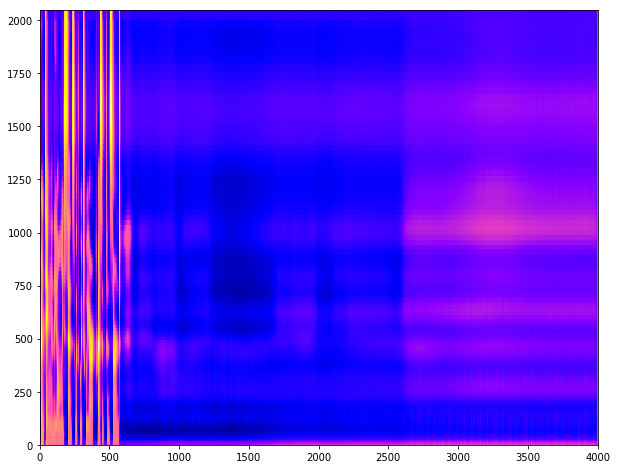

In [22]:
plt.figure(figsize=(10, 8))
plt.pcolormesh(natural_nm.T, cmap='gnuplot2')
plt.show()

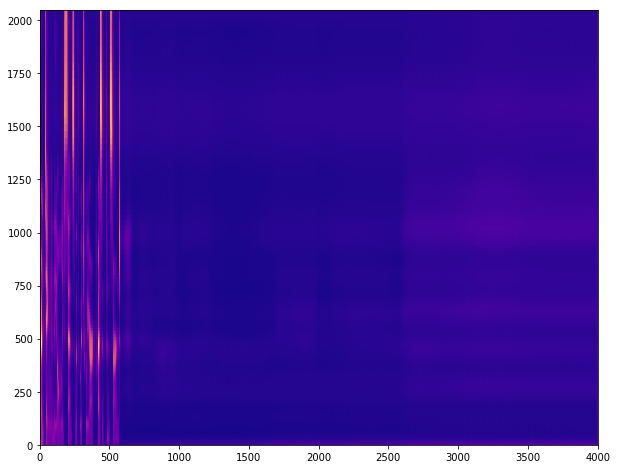

In [15]:
plt.figure(figsize=(10, 8))
plt.pcolormesh(natural_spec.T, cmap='plasma')
plt.show()

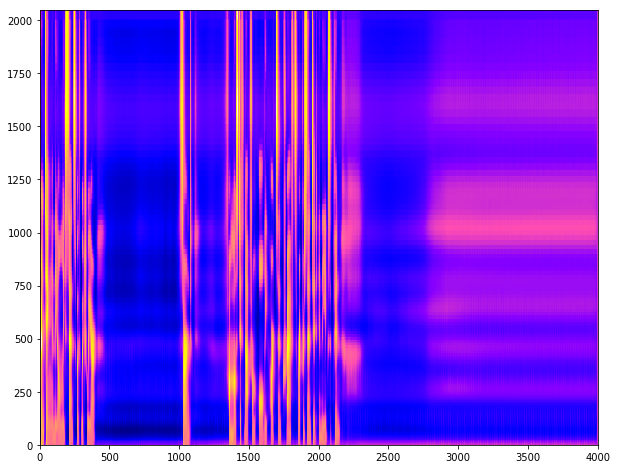

In [23]:
plt.figure(figsize=(10, 8))
plt.pcolormesh(eal_nm.T, cmap='gnuplot2')
plt.show()

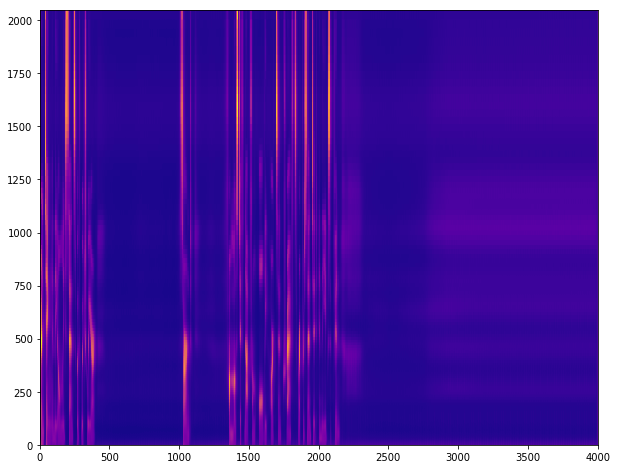

In [17]:
plt.figure(figsize=(10, 8))
plt.pcolormesh(eal_spec.T, cmap='plasma')
plt.show()

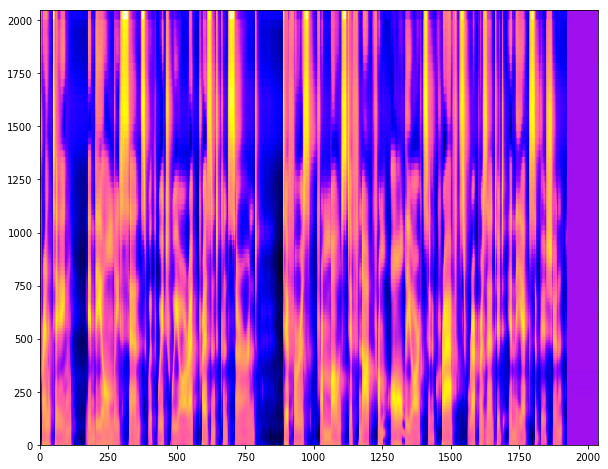

In [24]:
plt.figure(figsize=(10, 8))
plt.pcolormesh(gta_nm.T, cmap='gnuplot2')
plt.show()

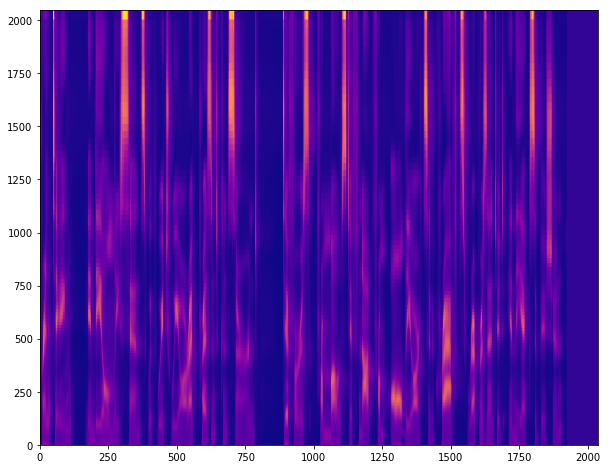

In [18]:
plt.figure(figsize=(10, 8))
plt.pcolormesh(gta_spec.T, cmap='plasma')
plt.show()

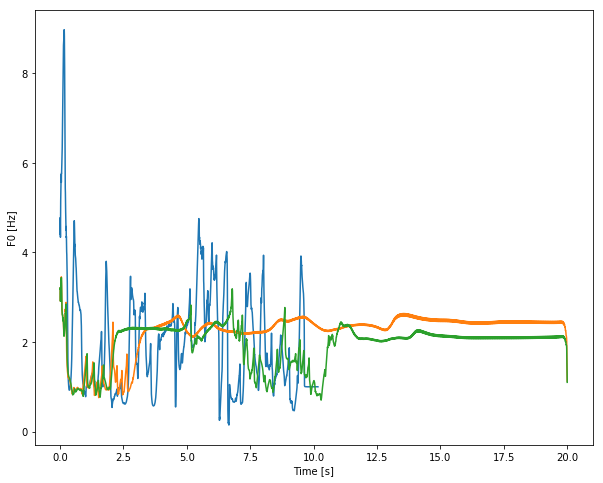

In [8]:
plt.figure(figsize=(10, 8))
plt.plot(gta_time_steps, gta_f0)
plt.plot(full_time_steps, natural_f0)
plt.plot(full_time_steps, eal_f0)
plt.xlabel('Time [s]')
plt.ylabel('F0 [Hz]')
plt.show()